# 5 Modeling<a id='5_Modeling'></a>

## 5.1 Contents<a id='5.1_Contents'></a>
* [5 Modeling](#5_Modeling)
  * [5.1 Contents](#5.1_Contents)
  * [5.2 Introduction](#5.2_Introduction)
  * [5.3 Imports](#5.3_Imports)
  * [5.4 Load Data](#5.4_Load_Data)
  * [5.5 Prepare Data](#5.5_Prepare_Data)
  * [5.6 Splitting Data](#5.6_Splitting_Data)
      * [5.6.1 Scaling data](#5.6.1_Scaling_data)
  * [5.7 Training Modela](#5.7_Training_Models)
     * [5.7.1 Linear Regression](#5.7.1_Linear_Regression)
          * [5.7.1.1 OLS on Scaled data](#5.7.1.1_OLS_on_Scaled_data)
     * [5.7.2 Lasso Regression](#5.7.2_Lasso_Regression)
          * [5.7.2.1 Lasso on Scaled data](#5.7.2.1_Lasso_on_Scaled_data)
     * [5.7.3 Bayesian Ridge Regression](#5.7.3_Bayesian_Ridge_Regression)
          * [5.7.3.1 Bayesian Ridge on Scaled data](#5.7.3.1_Bayesian_Ridge_on_Scaled_data)
     * [5.7.4 SGD Regression](#5.7.4_SGD_Regression)
          * [5.7.4.1 SGD on Scaled data](#5.7.4.1_SGD_on_Scaled_data)
     * [5.7.5 Decision Tree Regression](#5.7.5_Decision_Tree_Regression)
     * [5.7.6 Random Forest Regression](#5.7.6_Random_Forest_Regression)
  * [5.8 Using GridSearchCV & Cross-Validation](#5.8_Using_GridSearchCV_&_Cross-Validation)
     * [5.8.1 Multiple Linear Regression without Regularization](#5.8.1_Multiple_Linear_Regression_without_Regularization)
     * [5.8.2 GridSearchCV with Ridge](#5.8.2_GridSearchCV_with_Ridge)
     * [5.8.3 GridSearchCV with Lasso](#5.8.3_GridSearchCV_with_Lasso)
     * [5.8.4 GridSearchCV with ElasticNet](#5.8.4_GridSearchCV_with_ElasticNet)
     * [5.8.5 Dataframe of Coefficients](#5.8.5_Dataframe_of_Coefficients)
   


## 5.2 Introduction<a id='5.2_Introduction'></a>

In this notebook, we now take our two final datasets one which is original with all the features and the other a smaller version excluding two features i.e State & City. Here we will train our data in some regression models (Linear as well as non- linear) to gain insights about the duration prediction for the UFO Sightings as well as explore the sensitivity of changes to various parameters. 


## 5.3 Imports<a id='5.3_Imports'></a>

In [2]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import sca#le
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

## 5.4 Load Data<a id='5.4_Load_Data'></a>

Lets load the previously cleaned and preprocessed datasets, One dataset has all the featrures as in the original dataset and the second dataset has reduced features except State & City

In [3]:
data_1 = pd.read_csv('UFO_dataset_1.csv')

In [4]:
data_2 = pd.read_csv('UFO_dataset_2.csv')

In [5]:
data_1 = data_1.drop(['Unnamed: 0'], axis = 1)

In [6]:
data_1.head()

,Duration_minutes,Country,State,City,Year,Month,sh,lat,long,Day,Hour
0,45.00,US,Texas,San Marcos,1949,10,cylinder,29.883056,-97.941111,10,20
1,60.00,US,Texas,Lackland Air Force Base,1949,10,light,29.384210,-98.581082,10,21
2,0.33,GB,England,Blacon,1955,10,circle,53.200000,-2.916667,10,17
3,30.00,US,Texas,Edna,1956,10,circle,28.978333,-96.645833,10,21
4,15.00,US,Hawaii,Kane'ohe,1960,10,light,21.418056,-157.803611,10,20


In [7]:
data_2 = data_2.drop(['Unnamed: 0'], axis = 1)

In [8]:
data_2.head()

,Duration_minutes,Country,Year,Month,sh,lat,long,Day,Hour
0,45.00,US,1949,10,cylinder,29.883056,-97.941111,10,20
1,60.00,US,1949,10,light,29.384210,-98.581082,10,21
2,0.33,GB,1955,10,circle,53.200000,-2.916667,10,17
3,30.00,US,1956,10,circle,28.978333,-96.645833,10,21
4,15.00,US,1960,10,light,21.418056,-157.803611,10,20


As seen below both the daatsets have 77500 rows and one dataset has 11 features including the target variable - Duration Minutes, and other one has 9 features

## 5.5 Prepare Data<a id='5.5_Prepare_Data'></a>

In [9]:
data_1.shape

(77544, 11)

In [10]:
data_2.shape

(77544, 9)

Lets check the null values and datat types for the variables if they are correctly specified

In [11]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77544 entries, 0 to 77543
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Duration_minutes  77544 non-null  float64
 1   Country           77544 non-null  object 
 2   State             77544 non-null  object 
 3   City              77544 non-null  object 
 4   Year              77544 non-null  int64  
 5   Month             77544 non-null  int64  
 6   sh                77544 non-null  object 
 7   lat               77544 non-null  float64
 8   long              77544 non-null  float64
 9   Day               77544 non-null  int64  
 10  Hour              77544 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 6.5+ MB


In [12]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77544 entries, 0 to 77543
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Duration_minutes  77544 non-null  float64
 1   Country           77544 non-null  object 
 2   Year              77544 non-null  int64  
 3   Month             77544 non-null  int64  
 4   sh                77544 non-null  object 
 5   lat               77544 non-null  float64
 6   long              77544 non-null  float64
 7   Day               77544 non-null  int64  
 8   Hour              77544 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 5.3+ MB


Running describe function to get a summary of the numerical features

In [13]:
data_1.describe()

,Duration_minutes,Year,Month,lat,long,Day,Hour
count,77544.000000,77544.000000,77544.000000,77544.000000,77544.000000,77544.000000,77544.000000
mean,15.064775,2003.865483,6.846023,37.493601,-85.365670,15.011581,15.681368
std,72.835275,10.474986,3.234539,11.420374,40.702674,8.908286,7.640320
min,0.000000,1910.000000,1.000000,-82.862752,-173.985008,1.000000,0.000000
25%,0.500000,2001.000000,4.000000,34.052222,-112.046944,7.000000,11.000000
50%,3.000000,2006.000000,7.000000,39.219167,-87.671528,15.000000,19.000000
75%,10.000000,2011.000000,9.000000,42.679167,-77.915833,22.000000,21.000000
max,5760.000000,2014.000000,12.000000,72.700000,178.441900,31.000000,23.000000


In Dataset 1, we have four cateforical features i.e Country, State, City, Shape while in Datset 2 we have 2 categorical features i.e Country and Shape.

As per the preprocessing done in the previous notebook, Our categorical columns have following unique values

    * Country  - 10 
    * State - 796
    * City - >10000
    * Shape - 28

In few steps below we have encoded our categorical variables as to have all numerical features for regression modelling

Since we have to convert aur categorical features into numerical for regressiona models, encoding for categorical features is performed below

* I have used two encoding techniques - Binary Encoding for the original dataset and Ordinal encoding for the second dataset

### 5.5.1 Dataset 1<a id='5.5.1_Dataset_1'></a>

In [15]:
X_1 = data_1[['Country','State','City','Year','Month','sh','lat','long','Day','Hour']]
y_1 = data_1['Duration_minutes']

ce_Bin = ce.BinaryEncoder(cols=['Country', 'sh','City','State'])

X_1 = ce_Bin.fit_transform(X_1)

D:\Anacon\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [16]:
X_1.shape

(77544, 43)

After using Binary encoding or original data, Because Of State and City columns which have a lot of unique values,
we have 43 columns and 77544 rows

### 5.5.2 Dataset 2<a id='5.5.2_Dataset_2'></a>

In [17]:
X_2 = data_2[['Country','Year','Month','sh','lat','long','Day','Hour']]
y_2 = data_2['Duration_minutes']

ce_ordinal = ce.OrdinalEncoder(cols = ['Country', 'sh'])

X_2 = ce_ordinal.fit_transform(X_2)

D:\Anacon\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [18]:
X_2.head()

,Country,Year,Month,sh,lat,long,Day,Hour
0,1,1949,10,1,29.883056,-97.941111,10,20
1,1,1949,10,2,29.384210,-98.581082,10,21
2,2,1955,10,3,53.200000,-2.916667,10,17
3,1,1956,10,3,28.978333,-96.645833,10,21
4,1,1960,10,2,21.418056,-157.803611,10,20


In [19]:
X_2.shape

(77544, 8)

## 5.6 Splitting Data<a id='5.6_Splitting_Data'></a>

In [20]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size = .25, random_state = 40)

In [21]:
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size = .25, random_state = 40)

<b> Correlation Matrix to find coefficient of correlation between the independent features</b>

<AxesSubplot:>

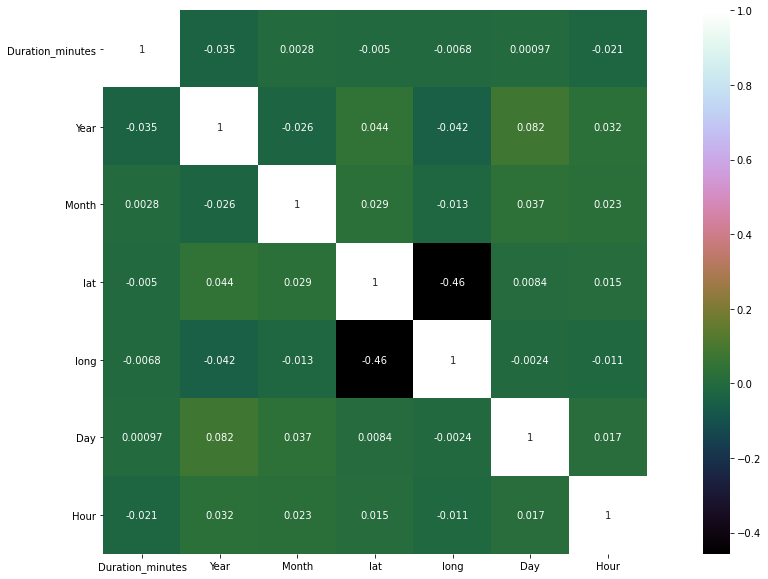

In [22]:
corr_mat=data_2.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')


<AxesSubplot:>

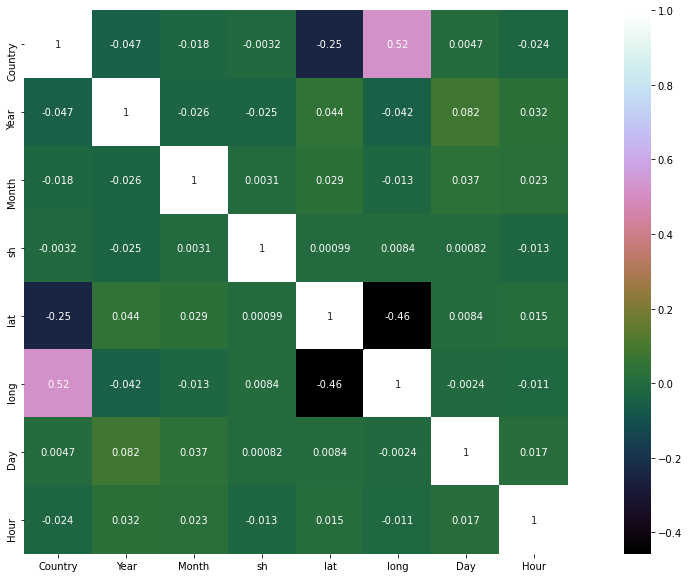

In [23]:
corr_mat1=X_2.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat1,vmax=1,square=True,annot=True,cmap='cubehelix')


As seen above, 
In first matrix  -  there is not much correlation between the features and also the target variable doesn;t have any strong correlation with the independent variables

Second Matrix - Is the encoded matrix , again not much correlation between the features

### 5.6.1 Scaling data<a id='5.6.1_Scaling_data'></a>

Scaling data to see if it affects our modelling in improving 

In [24]:
X_2_std = StandardScaler().fit_transform(X_2)

In [25]:
X_2_std_train, X_2_std_test, y_2_train, y_2_test = train_test_split(X_2_std, y_2, test_size = .25, random_state = 40)

## 5.7 Training Models<a id='5.7_Training_Models'></a>

First Model to train is the Multiple Linear regression withoput any regulaization, Here I am using second dataset to train and predict for my test set. Metrics being used are RMSE & R2

### 5.7.1 Linear Regression<a id='5.7.1_Linear_Regression'></a>

In [26]:
model_1=linear_model.LinearRegression()
model_1.fit(X_2_train,y_2_train)
y_2_predict=model_1.predict(X_2_test)

In [27]:
np.sqrt(mean_squared_error(y_2_test, y_2_predict))

86.53263474135665

In [29]:
r2_score(y_2_test, y_2_predict)

0.0020077443091892633

In [30]:
params = pd.Series(model_1.coef_, index=X_2_train.columns)
params

Country    0.466328
Year      -0.202387
Month      0.058864
sh        -0.124371
lat       -0.053458
long      -0.032195
Day        0.027042
Hour      -0.179296
dtype: float64

In [31]:
model_1.intercept_

421.905359616978

AS seen above running normal multiple linear regression, gives RMSE of 86.53 Minuetes and r2 score of .002007. Except Country, Month and Day, rest all the features are negatively correlated with the target variable. Intercept seems to high at 421 Minutes
Lets check the residual plot

Text(0.5, 1.0, 'Residual plot in Linear Regression')

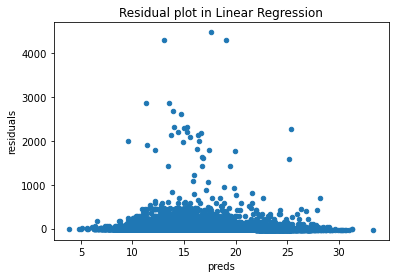

In [33]:
preds = pd.DataFrame({"preds":model_1.predict(X_2_train), "true":y_2_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Linear Regression")

It can be observed there are quite a few outliers as seen above but most of the residuals are almost near 0. Lets run teh regression on scaled data

#### 5.7.1.1 OLS on Scaled data<a id='5.7.1.1_OLS_on_Scaled_data'></a>

In [34]:
model_std=linear_model.LinearRegression()
model_std.fit(X_2_std_train,y_2_train)
y_2_pred=model_std.predict(X_2_std_test)

In [35]:
np.sqrt(mean_squared_error(y_2_test, y_2_pred))

86.53263474135665

In [36]:
r2_score(y_2_test, y_2_pred)

0.0020077443091892633

In [38]:
model_std.intercept_

14.806424131134227

Text(0.5, 1.0, 'Residual plot in Linear Regression After Scaling')

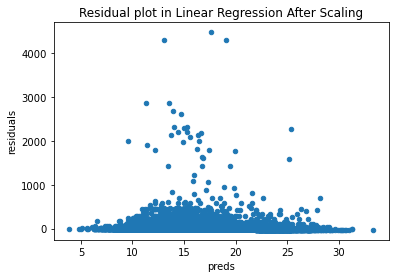

In [37]:
preds = pd.DataFrame({"preds":model_std.predict(X_2_std_train), "true":y_2_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Linear Regression After Scaling")

Nothing much has changed after scaling, result is same except the intercept is now 14 minutes but RMSE is same as before 86 minutes, not much differnce

Lets try regression with reqularization 

### 5.7.2 Lasso Regression<a id='5.7.2Lasso_Regression'></a>

In [47]:
model_ls=linear_model.Lasso(alpha = 1)
model_ls.fit(X_2_train,y_2_train)
y_2_pred=model_ls.predict(X_2_test)

In [48]:
np.sqrt(mean_squared_error(y_2_test, y_2_pred))

86.5333285985083

In [49]:
np.sqrt(mean_squared_error(y_2_train, model_ls.predict(X_2_train)))

67.55876295532676

In [50]:
r2_score(y_2_test, y_2_pred)

0.0019917395534755356

In [51]:
params = pd.Series(model_ls.coef_, index=X_2_train.columns)
params

Country    0.000000
Year      -0.194176
Month      0.000000
sh        -0.094793
lat       -0.043087
long      -0.023036
Day        0.014643
Hour      -0.162816
dtype: float64

In [52]:
model_ls.intercept_

406.60368180489087

Text(0.5, 1.0, 'Residual plot in Lasso Regression')

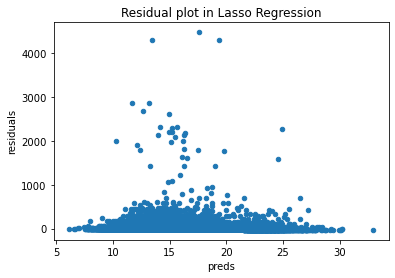

In [54]:
preds = pd.DataFrame({"preds":model_ls.predict(X_2_train), "true":y_2_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Lasso Regression")

Running Lasso regression with Alpha being 1.0 , RMSE is still same around 86.5 minutes whicle intercept has come low to 406.6, not much change in The Lasso Residual Plot. Lets Try Lasso on Scaled data

#### 5.7.2.1 Lasso on Scaled data<a id='5.7.2.1_Lasso_on_Scaled_data'></a>

In [55]:
model_ls.fit(X_2_std_train,y_2_train)
y_2_pred=model_ls.predict(X_2_std_test)

In [56]:
np.sqrt(mean_squared_error(y_2_test, y_2_pred))

86.57709990848402

In [57]:
r2_score(y_2_test, y_2_pred)

0.0009818355535958778

In [58]:
model_ls.score(X_2_std_train, y_2_train)

0.0009722522931218114

Runnig Lasso regression on Scaled Data has brought dorn the r2 score to .00098but not much difference in terms of RMSE

### 5.7.3 Bayesian Ridge Regression<a id='5.7.3_Bayesian_Ridge_Regression'></a>

In [60]:
model_br=linear_model.BayesianRidge()
model_br.fit(X_2_train,y_2_train)
y_2_pred=model_br.predict(X_2_test)

In [61]:
np.sqrt(mean_squared_error(y_2_test, y_2_pred))

86.53264157724313

In [63]:
r2_score(y_2_test, y_2_pred)

0.0020075866308275625

In [64]:
params = pd.Series(model_br.coef_, index=X_2_train.columns)
params

Country    0.072271
Year      -0.193245
Month      0.036546
sh        -0.105906
lat       -0.051177
long      -0.025638
Day        0.024845
Hour      -0.163984
dtype: float64

In [65]:
model_br.intercept_

404.41767084669715

Text(0.5, 1.0, 'Residual plot in Bayesian RIdge Regression')

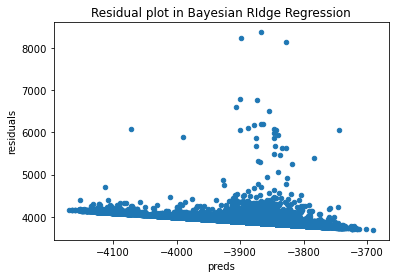

In [90]:
preds = pd.DataFrame({"preds":model_br.predict(X_2_train), "true":y_2_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Bayesian RIdge Regression")

Running Bayesian Ridge Also doesn't changes RMSE and R2 score again climbs up with intercept a bit down to 404. Running on Scaled data below

#### 5.7.3.1 Bayesian Ridge on Scaled data<a id='5.7.3.1_Bayesian_Ridge_on_Scaled_data'></a>

In [67]:
model_br.fit(X_2_std_train,y_2_train)
y_2_pred=model_br.predict(X_2_std_test)

In [68]:
np.sqrt(mean_squared_error(y_2_test, y_2_pred))

86.53542148514322

In [69]:
r2_score(y_2_test, y_2_pred)

0.001943463509032961

Text(0.5, 1.0, 'Residual plot in Bayesian RIdge Regression')

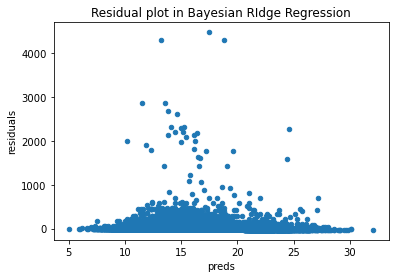

In [89]:
preds = pd.DataFrame({"preds":model_br.predict(X_2_std_train), "true":y_2_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Bayesian RIdge Regression")

Nothing much has changed in terms of RMSE but R2 has come down a bit

### 5.7.4 SGD Regression<a id='5.7.4_SGD_Regression'></a>

In [71]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor()

In [81]:
model.fit(X_2_train,y_2_train)
y_2_pred=model.predict(X_2_test)

In [82]:
np.sqrt(mean_squared_error(y_2_test, y_2_pred))

935807891743486.4

In [74]:
r2_score(y_2_test, y_2_pred)

-2.916127247887981e+25

Text(0.5, 1.0, 'Residual plot in SGD Regression')

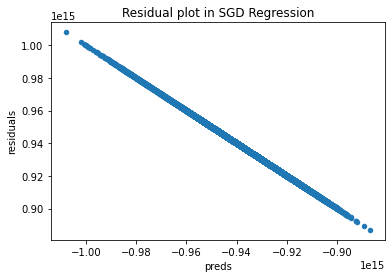

In [83]:
preds = pd.DataFrame({"preds":model.predict(X_2_train), "true":y_2_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in SGD Regression")

#### 5.7.4.1 SGD on Scaled data<a id='5.7.4.1_SGD_on_Scaled_data'></a>

In [84]:
model.fit(X_2_std_train,y_2_train)
y_2_pred=model.predict(X_2_std_test)

In [85]:
np.sqrt(mean_squared_error(y_2_test, y_2_pred))

86.56918663779108

In [86]:
r2_score(y_2_test, y_2_pred)

0.0011644505842155484

Text(0.5, 1.0, 'Residual plot in SGD Regression')

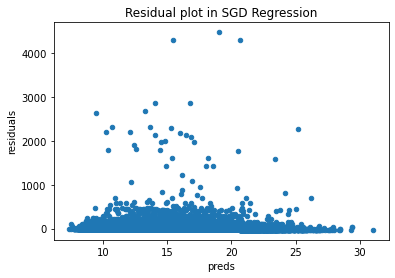

In [88]:
preds = pd.DataFrame({"preds":model.predict(X_2_std_train), "true":y_2_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in SGD Regression")

In case of SGD Regressor, unscaled data , RMSE is way too large, but it makes some sense on sclaed data nut this regressor is giving negative r2 valeu so the model doesn't seem to br a right chocie for our problem

### 5.7.5 Decision Tree Regression<a id='5.7.5_Decision_Tree_Regression'></a>

In [91]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_2_train,y_2_train)
y_2_pred=regressor.predict(X_2_test)

In [92]:
np.sqrt(mean_squared_error(y_2_test, y_2_pred))

118.7841637198628

In [93]:
r2_score(y_2_test, y_2_pred)

-0.8805479242516798

In [94]:
max_reg = None
max_score = 0  
best_max_depth = None
t=()
for m in range(2, 6) :
    rf_reg = DecisionTreeRegressor(max_depth=m)
    rf_reg = rf_reg.fit(X_2_train, y_2_train) 
    rf_reg_score = rf_reg.score(X_2_test,y_2_test)
    y_2_p = rf_reg.predict(X_2_test)
    print (m, rf_reg_score ,max_score, np.sqrt(mean_squared_error(y_2_test, y_2_pred)) )
    if rf_reg_score > max_score :
        max_score = rf_reg_score
        max_reg = rf_reg
        
        best_max_depth = rf_reg.max_depth
        
        t = (m,max_score) 
print (t)

2 0.0007123403855991972 0 118.7841637198628
3 -0.015788642979444045 0.0007123403855991972 118.7841637198628
4 -0.0012052548343661762 0.0007123403855991972 118.7841637198628
5 -0.009265192703063141 0.0007123403855991972 118.7841637198628
(2, 0.0007123403855991972)


Decision Tree Regression also gives negative r2 value except when max dept is 2 it gives a positive r2 os .007 and RMSE of 118.78 minutes. As seebn below it still doesn;t offer much on sclaed data

Text(0.5, 1.0, 'Residual plot in Decision Tree')

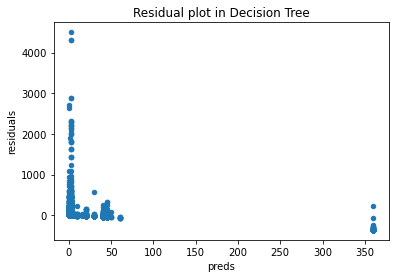

In [99]:
preds = pd.DataFrame({"preds":regressor.predict(X_2_train), "true":y_2_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Decision Tree")

In [100]:
regressor_best = DecisionTreeRegressor(random_state=0, max_depth = 2)
regressor_best.fit(X_2_train,y_2_train)
y_2_pred=regressor_best.predict(X_2_test)

In [101]:
np.sqrt(mean_squared_error(y_2_test, y_2_pred))

86.58877664150516

In [102]:
r2_score(y_2_test, y_2_pred)

0.0007123403855991972

Decision Tree regressor also doesn;t seem to be an ideal regression model for our dataset

### 5.7.6 Random Forest Regression<a id='5.7.6_Random_Forest_Regression'></a>

In [103]:
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_regressor.fit(X_2_train,y_2_train)
y_2_pred=rf_regressor.predict(X_2_test)

In [104]:
np.sqrt(mean_squared_error(y_2_test, y_2_pred))

90.74768718878622

In [105]:
r2_score(y_2_test, y_2_pred)

-0.09758571813311434

In [106]:
rf_regressor.fit(X_2_std_train,y_2_train)
y_2_pred=rf_regressor.predict(X_2_std_test)

In [107]:
np.sqrt(mean_squared_error(y_2_test, y_2_pred))

90.77407698381678

In [108]:
r2_score(y_2_test, y_2_pred)

-0.09822417569839526

Random Forest Regressor is also giving negative R2 so doesn't seem to b an ideal regression technique for our modelling

## 5.8 Using GridSearchCV & Cross-Validation<a id='5.8_Using_GridSearchCV_&_Cross-Validation'></a>

we have two sets X_1, X_2 , using various regression techniques to find the best parameters and model for our data using cross validation and GridsearchCV to see if we can fine tune our parmaters and improve our model. We will use R2 score as our metric for the gridsearch evaluation.
We are using dataset without splitting

### 5.8.1 Multiple Linear Regression without Regularization<a id='5.8.1_Multiple_Linear_Regression_without_Regularization'></a>

In [109]:
multiple_lr = linear_model.LinearRegression()
# Fitting the multiple_lr object to the data , this time using the whole feature matrix X
multiple_lr = linear_model.LinearRegression().fit(X_2,y_2)
# Importing cross_val_score function from the model_selection submodule of scikit learn
from sklearn.model_selection import cross_val_score
# storing the ten scores in an object called mse
r2= cross_val_score(multiple_lr,X_2,y_2,cv=5)

In [110]:
r2.mean()

0.0016047674374450205

MLR with Crossvalidation gives an average R2 of 0.0016047

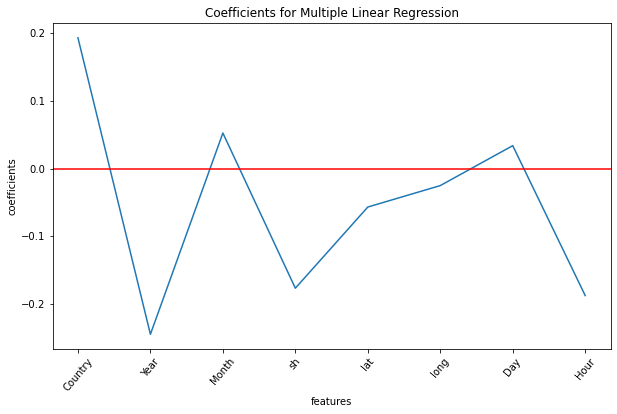

In [114]:
feature_names = X_2.columns
plt.figure(figsize=(10,6))
plt.plot(range(len(feature_names)),multiple_lr.coef_)
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_names)),feature_names,rotation=50)
plt.title("Coefficients for Multiple Linear Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

### 5.8.2 GridSearchCV with Ridge<a id='5.8.2_GridSearchCV_with_Ridge'></a>

In [115]:
alpha_values = {'alpha':[0.001, 0.01,0.02,0.03,0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50,100]}
ridge= GridSearchCV(linear_model.Ridge(), alpha_values, cv=5 )


In [116]:
print('The best value of alpha is:',ridge.fit(X_2,y_2).best_params_)

The best value of alpha is: {'alpha': 100}


In [117]:
print('The best score for the best Ridge estimator is:',ridge.fit(X_2,y_2).best_score_)

The best score for the best Ridge estimator is: 0.0016048149494722885


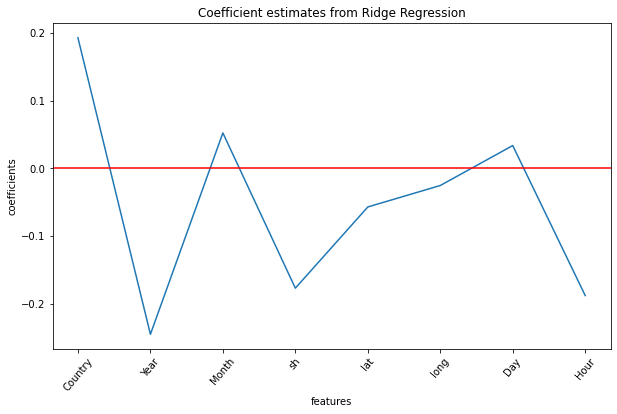

In [118]:
best_ridge_model= linear_model.Ridge(alpha=100)
# Extracting the coefficient estimates for all ten features
best_ridge_coeffs = best_ridge_model.fit(X_2,y_2).coef_
# plotting the coefficient estimates for all ten features
plt.figure(figsize=(10,6))
plt.plot(range(len(feature_names)),best_ridge_coeffs)
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_names)),feature_names,rotation=50)
plt.title("Coefficient estimates from Ridge Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

With GRidSerchCV & ridge as the estimator, The best value for alpha came out to be 100 and r2 of .0016049 which is nearly same as MLR

Lets Try Lasso With gridSearch and list of parameters

### 5.8.3 GridSearchCV with Lasso<a id='5.8.3_GridSearchCV_with_Lasso'></a>

In [119]:
alpha_values = {'alpha':[0.001, 0.01,0.02,0.03,0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50,100]}
lasso= GridSearchCV(linear_model.Lasso(), alpha_values, cv=5 )

In [120]:
print('The best value of alpha is:',lasso.fit(X_2,y_2).best_params_)

The best value of alpha is: {'alpha': 1}


In [121]:
print('The best score for the best Lasso estimator is:',lasso.fit(X_2,y_2).best_score_)

The best score for the best Lasso estimator is: 0.0016325346963980136


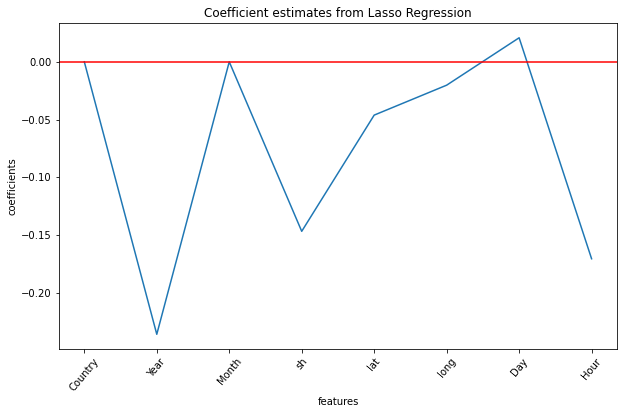

In [122]:

best_lasso_model= linear_model.Lasso(alpha=1)
# Extracting the coefficient estimates for all ten features
best_lasso_coeffs = best_lasso_model.fit(X_2,y_2).coef_
# plotting the coefficient estimates for all ten features
plt.figure(figsize=(10,6))
plt.plot(range(len(feature_names)),best_lasso_coeffs)
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_names)),feature_names,rotation=50)
plt.title("Coefficient estimates from Lasso Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

Lasso Regression seems to be ideal with alpha being 1 and slight increase in r2 score with .001632, it seems better than other models

NExt is ElasticNet regression

### 5.8.4 GridSearchCV with ElasticNet<a id='5.8.4_GridSearchCV_with_ElasticNet'></a>

In [123]:
alpha_values = {'alpha':[0.00005,0.0005,0.001, 0.01, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100],
 'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1]}
elastic= GridSearchCV(ElasticNet(), alpha_values, cv=10 )

In [124]:
print('The best value of alpha is:',elastic.fit(X_2,y_2).best_params_)

The best value of alpha is: {'alpha': 5, 'l1_ratio': 0.1}


In [125]:
print('The best score for the best elastic net estimator is:',elastic.fit(X_2,y_2).best_score_)

The best score for the best elastic net estimator is: 0.0015916877881827051


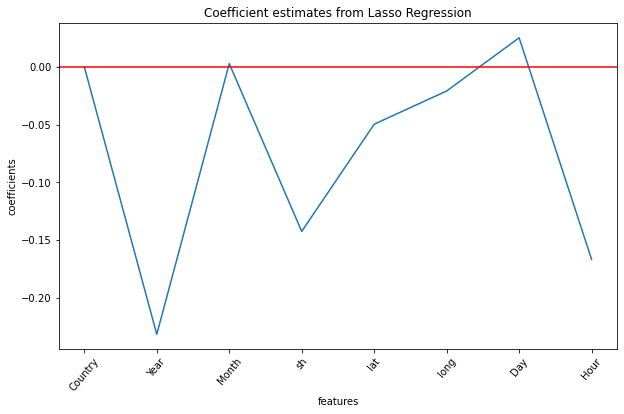

In [127]:
best_en_model= linear_model.ElasticNet(alpha=5, l1_ratio = 0.1)
# Extracting the coefficient estimates for all ten features
best_en_coeffs = best_en_model.fit(X_2,y_2).coef_
# plotting the coefficient estimates for all ten features
plt.figure(figsize=(10,6))
plt.plot(range(len(feature_names)),best_lasso_coeffs)
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_names)),feature_names,rotation=50)
plt.title("Coefficient estimates from Lasso Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

With Elastic Net, alpha of 5 and L1 Ratio of 0.1 gives us r2 score of .001591. 

### 5.8.5 Dataframe of Coefficients<a id='5.8.5_Dataframe_of_Coefficients'></a>

A dataframe with differennt coefficients for the dependent variables is created below using various linear regression techniques  to compare the results

In [128]:
comparing_models = pd.DataFrame({'without_regularization':multiple_lr.coef_,
 'Ridge':best_ridge_coeffs,
 'Lasso':best_lasso_coeffs,
 'ElasticNet' : best_en_coeffs},
 index=feature_names)
# Highlighting coefficient estimates with value '0'
def color_red_for_zero(value):
 color = 'red' if value == 0 else 'black'
 return 'color: %s' % color
comparing_models= comparing_models.style.applymap(color_red_for_zero)
comparing_models

,without_regularization,Ridge,Lasso,ElasticNet
Country,0.193134,0.192902,0.000000,0.000000
Year,-0.244940,-0.244938,-0.231375,-0.231375
Month,0.052424,0.052417,0.002784,0.002784
sh,-0.176838,-0.176831,-0.142360,-0.142360
lat,-0.056930,-0.056930,-0.049605,-0.049605
long,-0.025245,-0.025241,-0.020873,-0.020873
Day,0.033758,0.033757,0.025173,0.025173
Hour,-0.187759,-0.187756,-0.166578,-0.166578


As seen normal Multiple Linear regression and ridge are almost same but Lasso differs a bit in terms of coefficients